In [72]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout,BatchNormalization
from tensorflow.keras.layers import ReLU
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score 


In [18]:
merge_df1=pd.read_csv(r"C:\Guvi project\Final Project\ANN Predictive Modeling of Retail Sales and Markdown Impact\final_data.csv")

In [19]:
merge_df1

,Unnamed: 0,store,dept,weekly_sales,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment,size,year,month,week,isholiday,type
0,0,1,1,24924.50,42.31,2.572,5347.45,203.26,24.73,1481.31,3359.45,211.096358,8.106,151315,2010,2,5,0,1
1,1,1,1,46039.49,38.51,2.548,5347.45,203.26,24.73,1481.31,3359.45,211.242170,8.106,151315,2010,2,6,1,1
2,2,1,1,41595.55,39.93,2.514,5347.45,203.26,24.73,1481.31,3359.45,211.289143,8.106,151315,2010,2,7,0,1
3,3,1,1,19403.54,46.63,2.561,5347.45,203.26,24.73,1481.31,3359.45,211.319643,8.106,151315,2010,2,8,0,1
4,4,1,1,21827.90,46.50,2.625,5347.45,203.26,24.73,1481.31,3359.45,211.350143,8.106,151315,2010,3,9,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,421565,45,98,508.37,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,118221,2012,9,39,0,2
421566,421566,45,98,628.10,64.89,3.985,5046.74,203.26,18.82,2253.43,2340.01,192.170412,8.667,118221,2012,10,40,0,2
421567,421567,45,98,1061.02,54.47,4.000,1956.28,203.26,7.89,599.32,3990.54,192.327265,8.667,118221,2012,10,41,0,2
421568,421568,45,98,760.01,56.47,3.969,2004.02,203.26,3.18,437.73,1537.49,192.330854,8.667,118221,2012,10,42,0,2


In [20]:
merge_df1.drop('Unnamed: 0',axis=1,inplace=True)

In [21]:
merge_df1.columns

Index(['store', 'dept', 'weekly_sales', 'temperature', 'fuel_price',
       'markdown1', 'markdown2', 'markdown3', 'markdown4', 'markdown5', 'cpi',
       'unemployment', 'size', 'year', 'month', 'week', 'isholiday', 'type'],
      dtype='object')

In [22]:
merge_df1.rename(columns={'isHoliday': 'Holiday_num'}, inplace=True)
merge_df1.rename(columns={'type': 'Type_'}, inplace=True)



In [23]:
merge_df1.columns

Index(['store', 'dept', 'weekly_sales', 'temperature', 'fuel_price',
       'markdown1', 'markdown2', 'markdown3', 'markdown4', 'markdown5', 'cpi',
       'unemployment', 'size', 'year', 'month', 'week', 'isholiday', 'Type_'],
      dtype='object')

In [24]:
merge_df1

,store,dept,weekly_sales,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment,size,year,month,week,isholiday,Type_
0,1,1,24924.50,42.31,2.572,5347.45,203.26,24.73,1481.31,3359.45,211.096358,8.106,151315,2010,2,5,0,1
1,1,1,46039.49,38.51,2.548,5347.45,203.26,24.73,1481.31,3359.45,211.242170,8.106,151315,2010,2,6,1,1
2,1,1,41595.55,39.93,2.514,5347.45,203.26,24.73,1481.31,3359.45,211.289143,8.106,151315,2010,2,7,0,1
3,1,1,19403.54,46.63,2.561,5347.45,203.26,24.73,1481.31,3359.45,211.319643,8.106,151315,2010,2,8,0,1
4,1,1,21827.90,46.50,2.625,5347.45,203.26,24.73,1481.31,3359.45,211.350143,8.106,151315,2010,3,9,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,508.37,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,118221,2012,9,39,0,2
421566,45,98,628.10,64.89,3.985,5046.74,203.26,18.82,2253.43,2340.01,192.170412,8.667,118221,2012,10,40,0,2
421567,45,98,1061.02,54.47,4.000,1956.28,203.26,7.89,599.32,3990.54,192.327265,8.667,118221,2012,10,41,0,2
421568,45,98,760.01,56.47,3.969,2004.02,203.26,3.18,437.73,1537.49,192.330854,8.667,118221,2012,10,42,0,2


In [25]:
#prepare for Train the data
x=merge_df1.drop(columns='weekly_sales')
y=merge_df1['weekly_sales']

In [26]:
x.columns

Index(['store', 'dept', 'temperature', 'fuel_price', 'markdown1', 'markdown2',
       'markdown3', 'markdown4', 'markdown5', 'cpi', 'unemployment', 'size',
       'year', 'month', 'week', 'isholiday', 'Type_'],
      dtype='object')

In [27]:
merge_df1

,store,dept,weekly_sales,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment,size,year,month,week,isholiday,Type_
0,1,1,24924.50,42.31,2.572,5347.45,203.26,24.73,1481.31,3359.45,211.096358,8.106,151315,2010,2,5,0,1
1,1,1,46039.49,38.51,2.548,5347.45,203.26,24.73,1481.31,3359.45,211.242170,8.106,151315,2010,2,6,1,1
2,1,1,41595.55,39.93,2.514,5347.45,203.26,24.73,1481.31,3359.45,211.289143,8.106,151315,2010,2,7,0,1
3,1,1,19403.54,46.63,2.561,5347.45,203.26,24.73,1481.31,3359.45,211.319643,8.106,151315,2010,2,8,0,1
4,1,1,21827.90,46.50,2.625,5347.45,203.26,24.73,1481.31,3359.45,211.350143,8.106,151315,2010,3,9,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,508.37,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,118221,2012,9,39,0,2
421566,45,98,628.10,64.89,3.985,5046.74,203.26,18.82,2253.43,2340.01,192.170412,8.667,118221,2012,10,40,0,2
421567,45,98,1061.02,54.47,4.000,1956.28,203.26,7.89,599.32,3990.54,192.327265,8.667,118221,2012,10,41,0,2
421568,45,98,760.01,56.47,3.969,2004.02,203.26,3.18,437.73,1537.49,192.330854,8.667,118221,2012,10,42,0,2


In [28]:
# #Split the data into train and test 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [79]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
x_train

array([[-0.56325731, -1.35479206, -1.61463615, ..., -0.90683014,
        -0.27477051,  0.61616764],
       [ 0.61027333, -0.63326098,  1.26954597, ..., -0.20008341,
        -0.27477051,  2.11667116],
       [-1.2673757 , -0.56766725,  1.0487707 , ..., -0.27075808,
        -0.27477051, -0.88433588],
       ...,
       [-0.64149269, -0.50207352, -0.37731823, ..., -0.62413145,
        -0.27477051, -0.88433588],
       [-0.56325731,  1.49853537,  0.39729379, ...,  0.01194061,
        -0.27477051,  0.61616764],
       [-0.71972807, -0.40368291, -0.45380303, ...,  1.07206071,
        -0.27477051, -0.88433588]])

Architecture-1

In [30]:
model1=Sequential()
model1.add(Dense(128,input_shape=(x_train.shape[1],),activation='relu'))  #hidden Layer-1
model1.add(Dropout(0.3))
model1.add(Dense(100,input_shape=(x_train.shape[1],),activation='relu'))  #hidden Layer-2
model1.add(Dropout(0.3))
model1.add(Dense(80,input_shape=(x_train.shape[1],),activation='relu'))   #hidden Layer-3
model1.add(Dropout(0.3))
model1.add(Dense(64,input_shape=(x_train.shape[1],),activation='relu'))   #hidden Layer-4
model1.add(Dropout(0.3))
model1.add(Dense(32,input_shape=(x_train.shape[1],),activation='relu'))   #hidden Layer-5
model1.add(Dropout(0.3))
model1.add(Dense(10,input_shape=(x_train.shape[1],),activation='relu'))   #hidden Layer-6
model1.add(Dropout(0.3))
model1.add(Dense(1))#output Layer


c:\Users\prasa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model1.compile(optimizer=Adam(learning_rate=0.001),loss="MeanSquaredError")


In [32]:
model1.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        12,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 80)             │         8,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 80)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         5,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,889 (120.66 KB)

 Trainable params: 30,889 (120.66 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
# Train the model1
result1=model1.fit(x_train,y_train,epochs=15,batch_size=32,validation_data=(x_test,y_test))

Epoch 1/15
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 60s 5ms/step - loss: 471242560.0000 - val_loss: 394910592.0000
Epoch 2/15
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 38s 4ms/step - loss: 426292256.0000 - val_loss: 385299072.0000
Epoch 3/15
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 38s 4ms/step - loss: 409637152.0000 - val_loss: 360948544.0000
Epoch 4/15
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 69s 7ms/step - loss: 395454112.0000 - val_loss: 330501056.0000
Epoch 5/15
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - loss: 369287808.0000 - val_loss: 345916448.0000
Epoch 6/15
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 42s 4ms/step - loss: 365171392.0000 - val_loss: 314047072.0000
Epoch 7/15
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 43s 4ms/step - loss: 356370688.0000 - val_loss: 303525216.0000
Epoch 8/15
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 51s 5ms/step - loss: 339737536.0000 - val_loss: 290523008.0000
Epoch 9/15
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 55s 5ms/step - loss: 328776832.0000 - val_loss: 262483936.0000
Epoch 10/15
10540/10540 ━━━━━━━━━━━━━

In [34]:
# Evaluate the model
y_pred=model1.predict(x_test)

2635/2635 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


In [63]:
y_pred

array([[47413.277],
       [ 8427.03 ],
       [ 4386.494],
       ...,
       [11343.987],
       [15054.72 ],
       [31982.664]], dtype=float32)

In [35]:
mae=mean_absolute_error(y_test,y_pred)  
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R²: {r2}')



MAE: 8646.2424255429
MSE: 244228591.96812537
RMSE: 15627.814689460756
R²: 0.5311016303037221


In [36]:
arch1_df=pd.DataFrame(result1.history)
arch1_df



,loss,val_loss
0,443902400.0,394910592.0
1,421614816.0,385299072.0
2,410092544.0,360948544.0
3,389151200.0,330501056.0
4,374616288.0,345916448.0
5,363451136.0,314047072.0
6,355654272.0,303525216.0
7,341564448.0,290523008.0
8,324426592.0,262483936.0
9,309917536.0,286944096.0


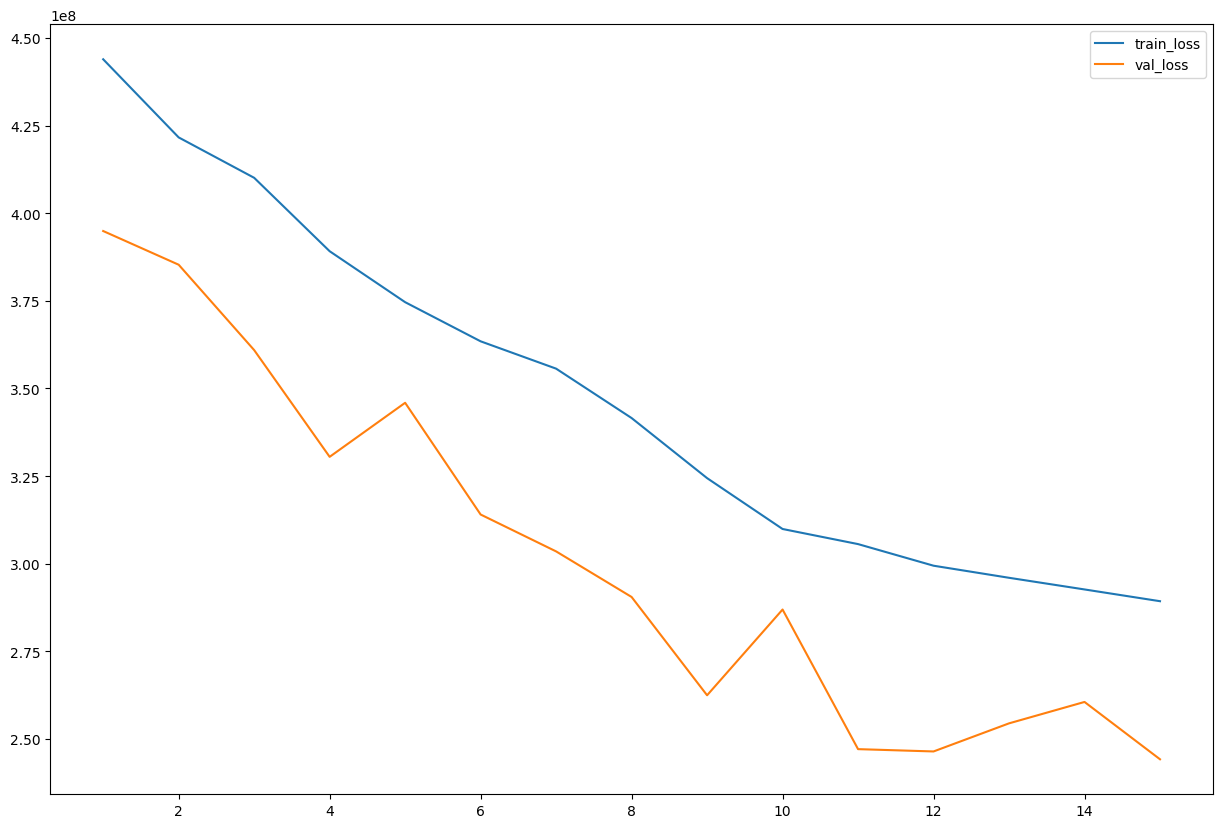

In [37]:
import plotly.express as px
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10),dpi=100)
plt.plot(range(1,16),arch1_df['loss'],label="train_loss")
plt.plot(range(1,16),arch1_df['val_loss'],label="val_loss")
plt.legend()
plt.show()

Architecture -2

In [38]:

model2= Sequential()
model2.add(Dense(64, input_shape=(x_train.shape[1],), activation='relu'))  # Hidden Layer-1
model2.add(Dropout(0.2))
model2.add(Dense(128, activation='relu'))  # Hidden Layer-2
model2.add(Dropout(0.2))
model2.add(Dense(64, activation='relu'))   # Hidden Layer-3
model2.add(Dropout(0.2))
model2.add(Dense(32, activation='relu'))   # Hidden Layer-4
model2.add(Dense(1))  # Output Layer

# Compile the model
model2.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

model2.summary()

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
result2 = model2.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=100, 
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)


c:\Users\prasa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,841 (77.50 KB)

 Trainable params: 19,841 (77.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 36s 3ms/step - loss: 462801888.0000 - mae: 13739.8564 - val_loss: 390364448.0000 - val_mae: 11971.4023
Epoch 2/100
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 32s 3ms/step - loss: 392808640.0000 - mae: 12204.9541 - val_loss: 381660128.0000 - val_mae: 11906.9775
Epoch 3/100
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 33s 3ms/step - loss: 381772064.0000 - mae: 12142.7637 - val_loss: 379294656.0000 - val_mae: 11959.0273
Epoch 4/100
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 34s 3ms/step - loss: 384009248.0000 - mae: 12136.7842 - val_loss: 378384480.0000 - val_mae: 12512.1055
Epoch 5/100
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - loss: 379582304.0000 - mae: 12060.6846 - val_loss: 378339104.0000 - val_mae: 12564.2549
Epoch 6/100
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - loss: 377607552.0000 - mae: 12080.2568 - val_loss: 370020960.0000 - val_mae: 11627.2305
Epoch 7/100
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - loss: 370089120.0000 - mae: 12022.5361 - val_loss: 3

In [43]:
y_pred=model2.predict(x_test)



2635/2635 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step


In [44]:
mae=mean_absolute_error(y_test,y_pred)  
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R²: {r2}')


MAE: 8001.871542731803
MSE: 199845794.95396549
RMSE: 14136.682600736478
R²: 0.6163128702932501


In [45]:
arch2_df=pd.DataFrame(result2.history)
arch2_df


,loss,mae,val_loss,val_mae
0,421405824.0,12976.924805,390364448.0,11971.402344
1,391444736.0,12219.654297,381660128.0,11906.977539
2,386860480.0,12163.886719,379294656.0,11959.027344
3,384318528.0,12129.098633,378384480.0,12512.105469
4,382553952.0,12110.225586,378339104.0,12564.254883
5,379203808.0,12070.583008,370020960.0,11627.230469
6,374111424.0,12012.370117,359041248.0,11594.581055
7,364095040.0,11839.621094,348053504.0,11138.530273
8,349961344.0,11538.498047,323120832.0,10873.355469
9,326465344.0,11037.839844,289938080.0,10224.339844


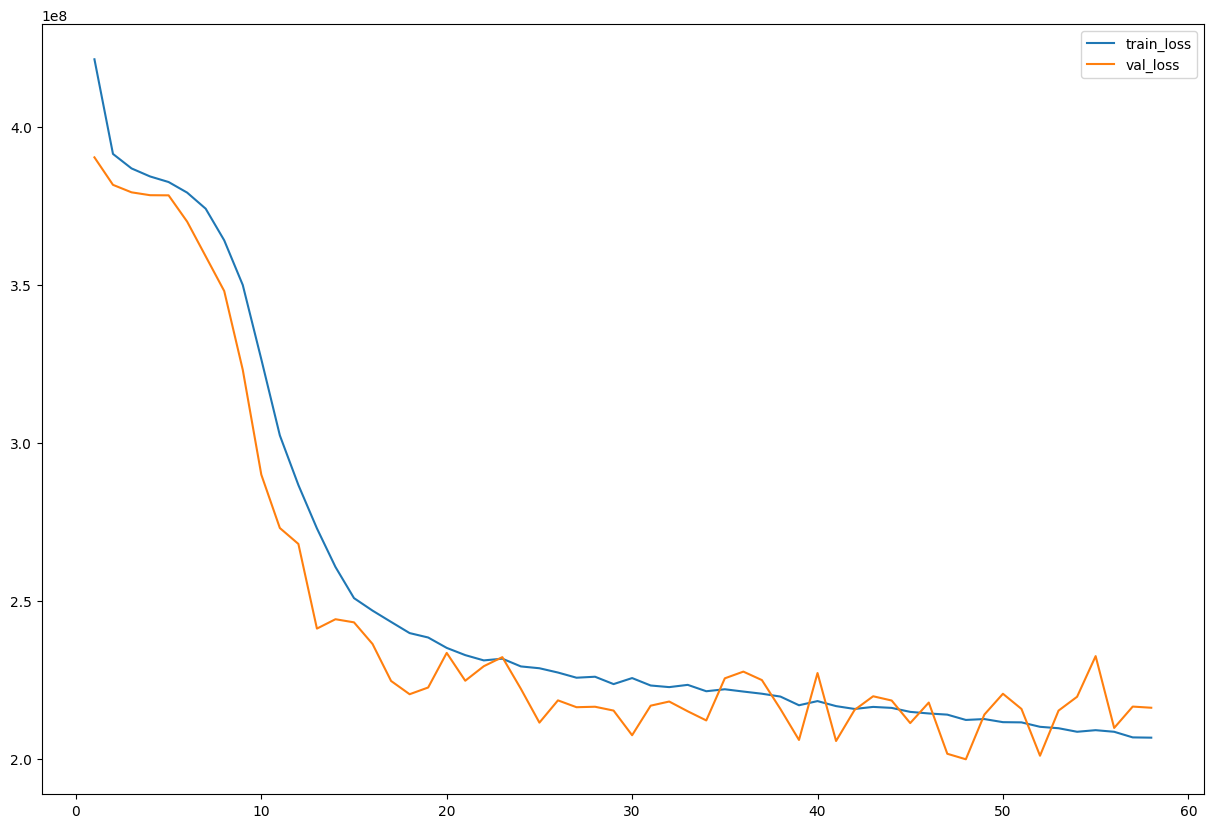

In [46]:
import plotly.express as px
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10),dpi=100)
plt.plot(range(1,59),arch2_df['loss'],label="train_loss")
plt.plot(range(1,59),arch2_df['val_loss'],label="val_loss")
plt.legend()
plt.show()

architecture-3

In [21]:
model3 = Sequential()

# Input and first hidden layer
model3.add(Dense(256, input_dim=x_train.shape[1], activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.3))

# Second hidden layer
model3.add(Dense(128, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.3))

# Third hidden layer
model3.add(Dense(64, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))

# Fourth hidden layer
model3.add(Dense(32, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))

# Output layer
model3.add(Dense(1, activation='linear'))

optimizer = Adam(learning_rate=0.001)
model3.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae', 'mse'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
result3 = model3.fit(x_train, y_train, validation_split=0.2,epochs=100, batch_size=32, callbacks=[early_stopping], verbose=1)

# Evaluate the model on the test data
test_loss, test_mae, test_mse = model3.evaluate(x_test, y_test, verbose=1)
print(f"Test MAE: {test_mae}")
print(f"Test MSE: {test_mse}")


c:\Users\prasa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 63s 7ms/step - loss: 739828992.0000 - mae: 15589.7725 - mse: 739828992.0000 - val_loss: 624755584.0000 - val_mae: 13538.9629 - val_mse: 624755584.0000
Epoch 2/100
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 47s 6ms/step - loss: 565320192.0000 - mae: 12799.8320 - mse: 565320192.0000 - val_loss: 401435520.0000 - val_mae: 10679.1445 - val_mse: 401435520.0000
Epoch 3/100
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 52s 6ms/step - loss: 392171424.0000 - mae: 10992.1895 - mse: 392171424.0000 - val_loss: 310617472.0000 - val_mae: 10473.0762 - val_mse: 310617472.0000
Epoch 4/100
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 50s 6ms/step - loss: 347275232.0000 - mae: 11405.9805 - mse: 347275232.0000 - val_loss: 311030848.0000 - val_mae: 10945.7002 - val_mse: 311030848.0000
Epoch 5/100
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 50s 6ms/step - loss: 336605312.0000 - mae: 11501.4072 - mse: 336605312.0000 - val_loss: 286629952.0000 - val_mae: 10444.9453 - val_mse: 286629952.0000
Epoch 6/100
8432/8432 ━━━━━━━━

In [22]:
y_pred=model3.predict(x_test)


2635/2635 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step


In [23]:
mae=mean_absolute_error(y_test,y_pred)  
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R²: {r2}')

MAE: 8371.412205554221
MSE: 198809286.14081606
RMSE: 14099.974685821817
R²: 0.6187529338042779


In [24]:
arch3_df=pd.DataFrame(result3.history)
arch3_df

,loss,mae,mse,val_loss,val_mae,val_mse
0,711708800.0,14999.714844,711708800.0,624755584.0,13538.962891,624755584.0
1,515425280.0,12092.279297,515425280.0,401435520.0,10679.144531,401435520.0
2,376211584.0,11079.097656,376211584.0,310617472.0,10473.076172,310617472.0
3,346113152.0,11477.971680,346113152.0,311030848.0,10945.700195,311030848.0
4,338245536.0,11507.125000,338245536.0,286629952.0,10444.945312,286629952.0
...,...,...,...,...,...,...
63,253774800.0,9827.682617,253774800.0,197460064.0,8386.075195,197460064.0
64,255380224.0,9853.212891,255380224.0,202652048.0,8692.129883,202652048.0
65,253354912.0,9837.266602,253354912.0,197441808.0,8391.481445,197441808.0
66,255212544.0,9844.622070,255212544.0,207299824.0,8409.392578,207299824.0


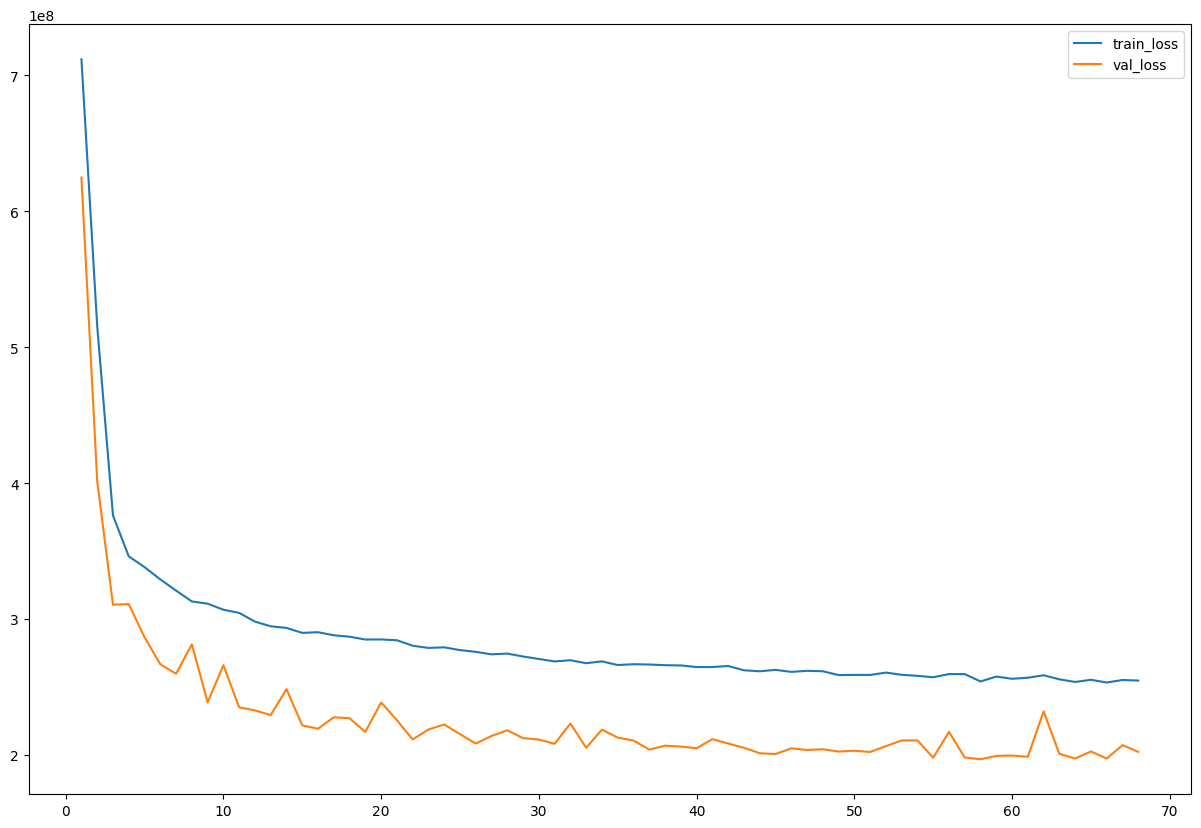

In [25]:
import plotly.express as px
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10),dpi=100)
plt.plot(range(1,69),arch3_df['loss'],label="train_loss")
plt.plot(range(1,69),arch3_df['val_loss'],label="val_loss")
plt.legend()
plt.show()

architecture-4

In [52]:
model4 = Sequential()

# First hidden layer
model4.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.3))

# Second hidden layer
model4.add(Dense(256, activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.3))

# Third hidden layer
model4.add(Dense(128, activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.2))

# Fourth hidden layer
model4.add(Dense(64, activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.2))

# Fifth hidden layer
model4.add(Dense(32, activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.2))

# Output layer
model4.add(Dense(1, activation='linear'))

optimizer = Adam(learning_rate=0.0005)
model4.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae', 'mse'])

early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Train the model
result4= model4.fit(x_train, y_train, validation_split=0.2,epochs=200,batch_size=64,callbacks=[early_stopping], verbose=1)

# Evaluate the model on the test data
test_loss, test_mae, test_mse = model4.evaluate(x_test, y_test, verbose=1)
print(f"Test MAE: {test_mae}")
print(f"Test MSE: {test_mse}")


c:\Users\prasa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
4216/4216 ━━━━━━━━━━━━━━━━━━━━ 82s 16ms/step - loss: 759188992.0000 - mae: 15918.5098 - mse: 759188992.0000 - val_loss: 762672128.0000 - val_mae: 15851.0693 - val_mse: 762672128.0000
Epoch 2/200
4216/4216 ━━━━━━━━━━━━━━━━━━━━ 62s 15ms/step - loss: 742598464.0000 - mae: 15613.5693 - mse: 742598464.0000 - val_loss: 728619904.0000 - val_mae: 15317.6777 - val_mse: 728619904.0000
Epoch 3/200
4216/4216 ━━━━━━━━━━━━━━━━━━━━ 63s 15ms/step - loss: 699429312.0000 - mae: 14979.0000 - mse: 699429312.0000 - val_loss: 672544384.0000 - val_mae: 14530.3623 - val_mse: 672544384.0000
Epoch 4/200
4216/4216 ━━━━━━━━━━━━━━━━━━━━ 96s 18ms/step - loss: 651720640.0000 - mae: 14230.0176 - mse: 651720640.0000 - val_loss: 608720256.0000 - val_mae: 13675.1309 - val_mse: 608720256.0000
Epoch 5/200
4216/4216 ━━━━━━━━━━━━━━━━━━━━ 73s 17ms/step - loss: 589227456.0000 - mae: 13424.4961 - mse: 589227456.0000 - val_loss: 536239072.0000 - val_mae: 12700.3184 - val_mse: 536239072.0000
Epoch 6/200
4216/4216 ━━━

In [70]:
x_test

array([[ 0.45380258, -0.14130798, -0.52486337, ..., -1.75492622,
        -0.27477051, -0.88433588],
       [-0.32855119,  1.59692598, -1.19369853, ..., -1.11885416,
        -0.27477051,  0.61616764],
       [ 1.23615634, -1.32199519,  0.89851332, ..., -0.34143275,
        -0.27477051,  2.11667116],
       ...,
       [ 1.15792096, -1.42038579, -0.06161501, ...,  1.28408473,
        -0.27477051,  2.11667116],
       [ 1.39262709,  1.69531658, -1.06134186, ..., -1.04817949,
        -0.27477051, -0.88433588],
       [-0.17208043, -0.92843279, -0.51292957, ..., -0.69480612,
        -0.27477051, -0.88433588]])

In [53]:
y_pred=model4.predict(x_test)


2635/2635 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step


In [82]:
input_data =[[1,27,0,62.25,3.308,6074.12,254.39,51.98,427.39,5988.57,218.2205,7.886,1,151315,2011,11,46]]

#         input_data =[[store, dept, isholiday, temperature, fuel_price, 
#                             markdown1, markdown2, markdown3, markdown4, 
#                             markdown5, cpi, unemployment, Type_, size, 
#                             year, month, week]]

                            

        # Convert the list to a NumPy array
input_data = np.array(input_data)

scaler = StandardScaler()
scaled_features = scaler.fit_transform(input_data)  # Replace with the actual scaler



prediction=model4.predict(scaled_features,verbose=0)
print(prediction)


[[-18188508.]]


In [83]:
scaled_features

array([[1.00000000e+00, 2.70000000e+01, 1.79344327e-17, 6.22500000e+01,
        3.30800000e+00, 6.07412000e+03, 2.54390000e+02, 5.19800000e+01,
        4.27390000e+02, 5.98857000e+03, 2.18220500e+02, 7.88600000e+00,
        1.00000000e+00, 1.51315000e+05, 2.01100000e+03, 1.10000000e+01,
        4.60000000e+01]])

In [66]:
y_pred[3638]

array([4242.1265], dtype=float32)

In [54]:
mae=mean_absolute_error(y_test,y_pred)  
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R²: {r2}')

MAE: 6335.619861077037
MSE: 121163832.3859322
RMSE: 11007.444407578547
R²: 0.7673756253758712


In [55]:
arch4_df=pd.DataFrame(result4.history)
arch4_df

,loss,mae,mse,val_loss,val_mae,val_mse
0,762335552.0,15899.664062,762335552.0,762672128.0,15851.069336,762672128.0
1,737540096.0,15500.004883,737540096.0,728619904.0,15317.677734,728619904.0
2,695074816.0,14846.716797,695074816.0,672544384.0,14530.362305,672544384.0
3,640568128.0,14043.340820,640568128.0,608720256.0,13675.130859,608720256.0
4,576649600.0,13157.924805,576649600.0,536239072.0,12700.318359,536239072.0
...,...,...,...,...,...,...
177,174112544.0,7956.509766,174112544.0,122945304.0,6435.829590,122945304.0
178,173143440.0,7937.114258,173143440.0,125788200.0,6340.510254,125788200.0
179,173791008.0,7937.130371,173791008.0,124397632.0,6316.430664,124397632.0
180,174033760.0,7937.850586,174033760.0,132419128.0,6601.443359,132419128.0


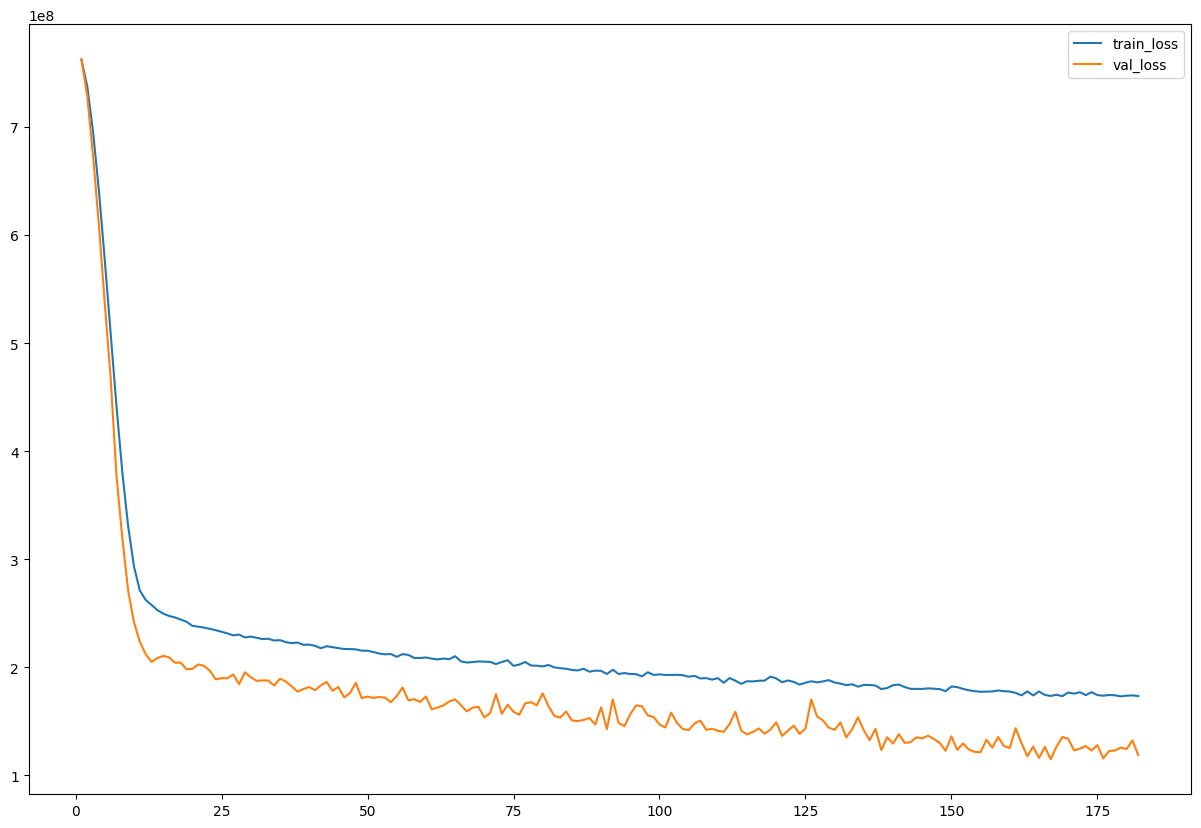

In [56]:
import plotly.express as px
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10),dpi=100)
plt.plot(range(1,183),arch4_df['loss'],label="train_loss")
plt.plot(range(1,183),arch4_df['val_loss'],label="val_loss")
plt.legend()
plt.show()

In [57]:
# #save the model
model4.save('ann_retail.h5')

In [61]:
from tensorflow.keras.models import load_model

custom_objects = {'ReLU': ReLU}

# Load the model with custom objects
loaded_model4 = load_model('ann_retail.h5', custom_objects=custom_objects)

In [62]:
loaded_model4.predict(x_test)

2635/2635 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step


array([[47413.277],
       [ 8427.03 ],
       [ 4386.494],
       ...,
       [11343.987],
       [15054.72 ],
       [31982.664]], dtype=float32)